In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#datetime format

In [ ]:
df['Date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df = df.dropna(subset=['Fare'])

#Resampling: Aggregating data

In [ ]:
weekly_data = df['Fare'].resample('W').mean()
print(weekly_data.head())

Date
2023-01-01     27.720800
2023-01-08    130.675600
2023-01-15    107.803571
2023-01-22    115.083343
2023-01-29     82.219643
Freq: W-SUN, Name: Fare, dtype: float64


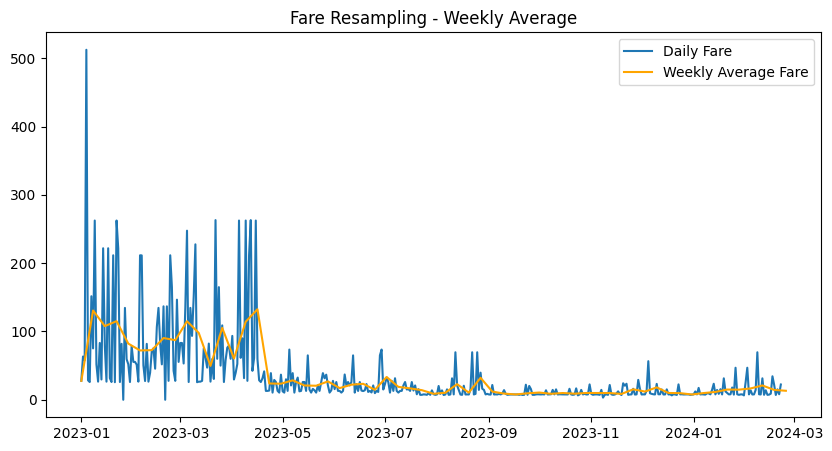

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Fare'], label='Daily Fare')
plt.plot(weekly_data.index, weekly_data, label='Weekly Average Fare', color='orange')
plt.legend()
plt.title('Fare Resampling - Weekly Average')
plt.show()

#Rolling statistics

In [ ]:
df['Rolling_Fare'] = df['Fare'].rolling(window=7).mean()

<ipython-input-29-0b6eabc8f09c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rolling_Fare'] = df['Fare'].rolling(window=7).mean()


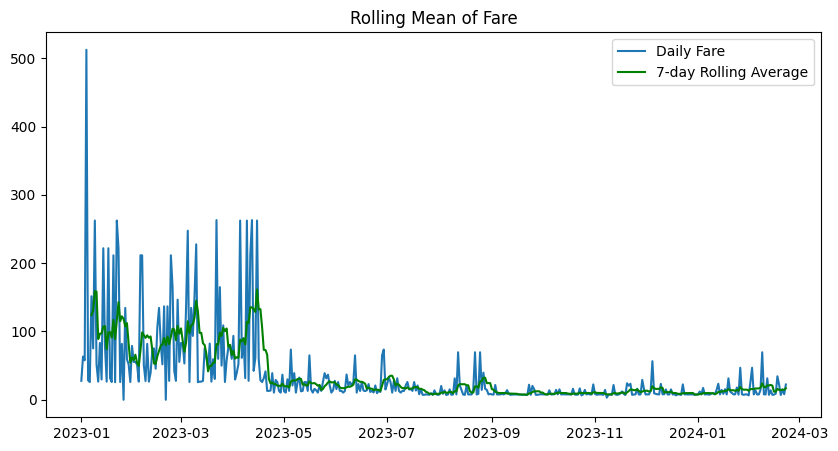

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Fare'], label='Daily Fare')
plt.plot(df.index, df['Rolling_Fare'], label='7-day Rolling Average', color='green')
plt.legend()
plt.title('Rolling Mean of Fare')
plt.show()

# Lagging

In [ ]:
df['Lag_1_Fare'] = df['Fare'].shift(1)
df['Lag_2_Fare'] = df['Fare'].shift(2)

print(df[['Fare', 'Lag_1_Fare', 'Lag_2_Fare']].head(10))

                Fare  Lag_1_Fare  Lag_2_Fare
Date                                        
2023-01-01   27.7208         NaN         NaN
2023-01-02   63.3583     27.7208         NaN
2023-01-03   57.7500     63.3583     27.7208
2023-01-04  512.3292     57.7500     63.3583
2023-01-05   28.5000    512.3292     57.7500
2023-01-06   26.0000     28.5000    512.3292
2023-01-07  151.5500     26.0000     28.5000
2023-01-08   75.2417    151.5500     26.0000
2023-01-09  262.3750     75.2417    151.5500
2023-01-10   51.8625    262.3750     75.2417


<ipython-input-31-060b2afe486e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lag_1_Fare'] = df['Fare'].shift(1)
<ipython-input-31-060b2afe486e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lag_2_Fare'] = df['Fare'].shift(2)


# Correlation with lagged features

In [ ]:
print("Correlation Matrix:")
print(df[['Fare', 'Lag_1_Fare', 'Lag_2_Fare']].corr())

Correlation Matrix:
                Fare  Lag_1_Fare  Lag_2_Fare
Fare        1.000000    0.298754    0.349552
Lag_1_Fare  0.298754    1.000000    0.298579
Lag_2_Fare  0.349552    0.298579    1.000000
